In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [26]:
transform = transforms.Compose([
    transforms.ToTensor(),      
    transforms.Normalize((0.5,), (0.5,)) 
])

In [27]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)

In [28]:
image, label = train_dataset[0]
print("Image shape:", image.shape)
print("Number of training samples:", len(train_dataset))

Image shape: torch.Size([1, 28, 28])
Number of training samples: 60000


In [29]:
image, label = test_dataset[0]
print("Image shape:", image.shape)
print("Number of testing samples:", len(test_dataset))



Image shape: torch.Size([1, 28, 28])
Number of testing samples: 10000


In [30]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [31]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)   # flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [32]:
from torchinfo import summary

model = CNNClassifier()

if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

print('Name: Arunmozhi Varman T')
print('Register Number: 212223230022')
summary(model, input_size=(1, 28, 28))

Name: Arunmozhi Varman T
Register Number: 212223230022


Layer (type:depth-idx)                   Output Shape              Param #
CNNClassifier                            [1, 10]                   --
├─Conv2d: 1-1                            [32, 28, 28]              320
├─ReLU: 1-2                              [32, 28, 28]              --
├─MaxPool2d: 1-3                         [32, 14, 14]              --
├─Conv2d: 1-4                            [64, 14, 14]              18,496
├─ReLU: 1-5                              [64, 14, 14]              --
├─MaxPool2d: 1-6                         [64, 7, 7]                --
├─Linear: 1-7                            [1, 128]                  401,536
├─ReLU: 1-8                              [1, 128]                  --
├─Dropout: 1-9                           [1, 128]                  --
├─Linear: 1-10                           [1, 10]                   1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 17.26
Input size (MB): 0.00
Forward

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = CNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Using device: cpu


In [34]:
def train_model(model, train_loader, num_epochs=5):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print('Name: Arunmozhi Varman T')
        print('Register Number: 212223230022')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

In [35]:
train_model(model, train_loader, num_epochs=10)

Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [1/10], Loss: 0.1650
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [2/10], Loss: 0.0613
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [3/10], Loss: 0.0458
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [4/10], Loss: 0.0343
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [5/10], Loss: 0.0284
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [6/10], Loss: 0.0243
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [7/10], Loss: 0.0210
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [8/10], Loss: 0.0182
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [9/10], Loss: 0.0146
Name: Arunmozhi Varman T
Register Number: 212223230022
Epoch [10/10], Loss: 0.0139


In [37]:
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            if torch.cuda.is_available():
                images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name: Arunmozhi Varman T')
    print('Register Number: 212223230022')
    print(f'Test Accuracy: {accuracy:.4f}')
    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name: Arunmozhi Varman T')
    print('Register Number: 212223230022')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    # Print classification report
    print('Name: Arunmozhi Varman T')
    print('Register Number: 212223230022')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(10)]))

Name: Arunmozhi Varman T
Register Number: 212223230022
Test Accuracy: 0.9912
Name: Arunmozhi Varman T
Register Number: 212223230022


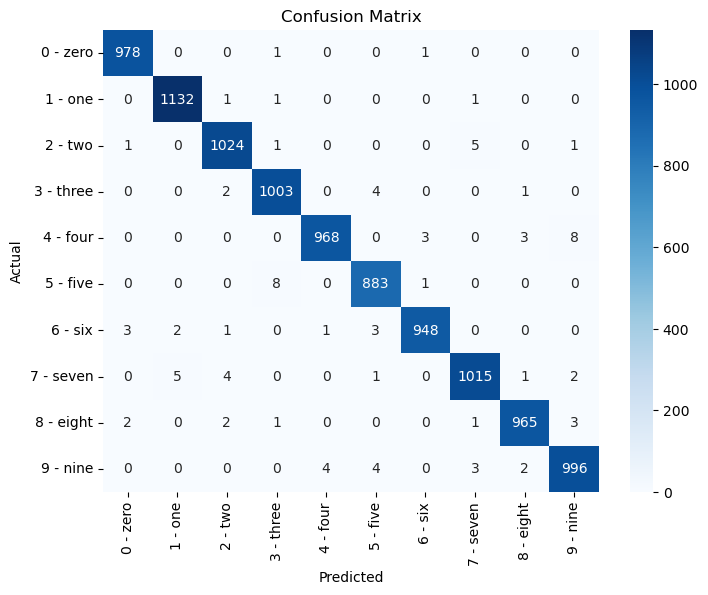

Name: Arunmozhi Varman T
Register Number: 212223230022
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


test_model(model, test_loader)

In [41]:
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    if torch.cuda.is_available():
        image = image.to(device)

    with torch.no_grad():
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output, 1)

    class_names = [str(i) for i in range(10)]

    print('Name: Arunmozhi Varman T')
    print('Register Number: 212223230022')
    plt.imshow(image.cpu().squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')

Name: Arunmozhi Varman T
Register Number: 212223230022


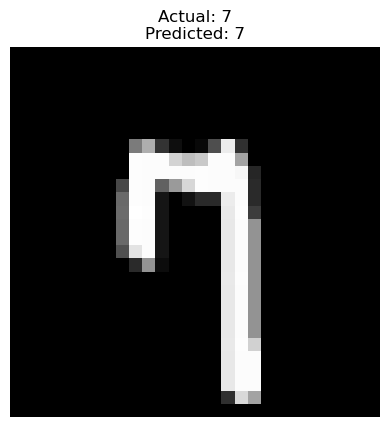

Actual: 7, Predicted: 7


In [42]:
predict_image(model, image_index=80, dataset=test_dataset)